# **American Tourism**

## **NYC Monthly Ridership Analysis**

### **Name**: William Rhee (wr86)
### Spring 2025

This project performs an explorative analysis on the **Federal Transit Administration's (FTA) National Transit Database (NTD)**.

We want to answer the following questions:
1. **\_______________________________?**
2. **\_______________________________?**

Here is a brief outline of this document:
1. Data Cleaning
2. Data Visualization
3. Model Implementation
4. Analysis

**Source of Data**: https://www.transit.dot.gov/ntd/data-product/monthly-module-adjusted-data-release

------------------------
## **[1] DATA CLEANING**

Before we conduct any analysis, we need to **clean** our data. Let's break this down into two steps — **A** and **B**.

**[A]** Focus on the **Unlinked Passenger Trips (UPT)** tab. For context:
+ "Unlinked Passenger Trips" tells us the number of times a passenger has boarded a vehicle (even if it's within the same trip).
+ "Unlinked Passenger Trips" is a metric used for ridership.

The code for part A is shown below.

In [52]:
import pandas as pd
import numpy as np

# [1] Import the Excel file.
xls = pd.ExcelFile("January 2025 Complete Monthly Ridership (with adjustments and estimates)_250303.xlsx")

# [2] Gather the sheet names.
sheet_names = xls.sheet_names                                                  # Here, sheet_names is a list containing the sheet names.

# [3] Among all sheets, extract the UPT sheet.
index_of_UPT = sheet_names.index("UPT")                                        # Here, UPT is the third sheet. In Python, it has an index of 2.
my_UPT_df = pd.read_excel(xls, sheet_name = sheet_names[index_of_UPT])         # Here, we imported the UPT sheet as a DataFrame.

# [4] To gain intuition, let's glance at our created DataFrame.
my_UPT_df.head()

,NTD ID,Legacy NTD ID,Agency,Mode/Type of Service Status,Reporter Type,UACE CD,UZA Name,Mode,TOS,3 Mode,...,4/2024,5/2024,6/2024,7/2024,8/2024,9/2024,10/2024,11/2024,12/2024,1/2025
0,1.0,0001,King County,Active,Full Reporter,80389.0,"Seattle--Tacoma, WA",DR,PT,Bus,...,89220.0,90826.0,82332.0,86007.0,90416.0,86251.0,94960.0,80691.0,87395.0,96298.0
1,1.0,0001,King County,Active,Full Reporter,80389.0,"Seattle--Tacoma, WA",DR,TX,Bus,...,9203.0,9951.0,8324.0,8535.0,9690.0,10668.0,11728.0,8482.0,7868.0,6315.0
2,1.0,0001,King County,Active,Full Reporter,80389.0,"Seattle--Tacoma, WA",FB,DO,Ferry,...,28741.0,38338.0,46948.0,67951.0,62910.0,46702.0,37503.0,25759.0,24240.0,26935.0
3,1.0,0001,King County,Inactive,Full Reporter,80389.0,"Seattle--Tacoma, WA",LR,DO,Rail,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,0001,King County,Active,Full Reporter,80389.0,"Seattle--Tacoma, WA",MB,DO,Bus,...,6108964.0,6401486.0,5933767.0,6137519.0,6019974.0,6139353.0,6820828.0,5983373.0,5655460.0,6158381.0


**[B]** As of now, we have imported the UPT sheet as a **DataFrame**. Now within the UPT tab, we will only consider:
+ NYC-based transportation agencies — this specifically refers to areas within the urbanized area **New York--Jersey City--Newark, NY--NJ**. 
+ The years **2015-2024**.

The code for part B is shown below:

In [53]:
# [1] Within the UPT DataFrame, extract the UZA column (Urbanized area).
UZA_column = my_UPT_df['UZA Name']

# [2] Within the UZA column, check if there are any NA (missing) values.
any_NA = UZA_column.isnull().values.any()
if any_NA == True:
    print("Some rows in the UZA column have missing values. Please remove those rows.")
else:
    print("No missing rows. No need to remove rows.")

# [3] Remove NA's and isolate unique areas (we don't want all thousand rows).
unique_areas = UZA_column.dropna().unique()                                    # Here, unique_areas is an array containing all the unique areas.
print("There are", str(len(unique_areas)), "areas.")                           # Here, we want to see how many unique areas we're dealing with.

Some rows in the UZA column have missing values. Please remove those rows.
There are 391 areas.


In [54]:
# [4] To gain intuition, here are all 391 unique areas.
sorted(unique_areas)                                                           # Reorganize and return the unique areas in alphabetical order.

['Abilene, TX',
 'Akron, OH',
 'Albany, GA',
 'Albany--Schenectady, NY',
 'Albuquerque, NM',
 'Alexandria, LA',
 'Allentown--Bethlehem, PA--NJ',
 'Altoona, PA',
 'Amarillo, TX',
 'Ames, IA',
 'Anchorage, AK',
 'Anderson, IN',
 'Anderson--Clemson, SC',
 'Ann Arbor, MI',
 'Antioch, CA',
 'Appleton, WI',
 'Asheville, NC',
 'Athens-Clarke County, GA',
 'Atlanta, GA',
 'Atlantic City--Ocean City--Villas, NJ',
 'Auburn, AL',
 'Augusta-Richmond County, GA--SC',
 'Austin, TX',
 'Bakersfield, CA',
 'Baltimore, MD',
 'Bangor, ME',
 'Barnstable Town, MA',
 'Baton Rouge, LA',
 'Battle Creek, MI',
 'Bay City, MI',
 'Beaumont, TX',
 'Bel Air--Aberdeen, MD',
 'Bellingham, WA',
 'Beloit, WI--IL',
 'Bend, OR',
 'Benton Harbor--Lincoln--St. Joseph, MI',
 'Billings, MT',
 'Binghamton, NY',
 'Birmingham, AL',
 'Bismarck, ND',
 'Blacksburg--Christiansburg, VA',
 'Bloomington, IN',
 'Bloomington--Normal, IL',
 'Boise City, ID',
 'Bonita Springs--Estero, FL',
 'Boston, MA--NH',
 'Boulder, CO',
 'Bowling Gree

Here, we only want to analyze the urbanized area **New York--Jersey City--Newark, NY--NJ**.

In [55]:
# [5] Within the UPT DataFrame, extract the ROWS that correspond to NYC.
my_NYC_df = my_UPT_df[my_UPT_df['UZA Name'] == 'New York--Jersey City--Newark, NY--NJ']   # Here, we defined a NYC DataFrame.

# [6] Within the NYC DataFrame, extract the COLUMNS for 2015-2024.
date_columns = []                                                                         # Initialize empty list (to be updated).
for col in my_NYC_df.columns:                                                             # Looping over every column heading in NYC DataFrame.
    if isinstance(col, str):
        for i in range(2015, 2026):
            if str(i) in col:
                date_columns.append(col)
                break                                                                     # Have list of column headings ['1/2015', ..., '1/2025'].
#date_columns

# [7] Extract the identifying columns 'Agency', 'Mode', 'TOS', and 'UZA Name.'
identif_columns = ['Agency', 'Mode', 'TOS', 'UZA Name']                                   # Have another list of column headings.

# [8] Use the two list of column names to filter the NYC DataFrame.
filtered_nyc_df = my_NYC_df[identif_columns + date_columns]                               # Defines a filtered NYC DataFrame.
print(filtered_nyc_df.shape)                                                              # Filtered NYC DataFrame is made of (113 rows, 125 col).

# [9] To gain intuition, let's glance at our created DataFrame.
filtered_nyc_df.head()                                                                    # Filtered NYC DataFrame

(113, 125)


,Agency,Mode,TOS,UZA Name,1/2015,2/2015,3/2015,4/2015,5/2015,6/2015,...,4/2024,5/2024,6/2024,7/2024,8/2024,9/2024,10/2024,11/2024,12/2024,1/2025
293,City of Long Beach,DR,DO,"New York--Jersey City--Newark, NY--NJ",1244.0,1278.0,1245.0,1198.0,1090.0,1020.0,...,394.0,413.0,397.0,380.0,455.0,428.0,361.0,390.0,418.0,444.0
294,City of Long Beach,MB,DO,"New York--Jersey City--Newark, NY--NJ",35739.0,35708.0,35609.0,34418.0,32884.0,33230.0,...,7787.0,9177.0,8588.0,7880.0,10415.0,9170.0,9487.0,8252.0,7703.0,7858.0
295,"Metropolitan Suburban Bus Authority, dba: MTA ...",DR,DO,"New York--Jersey City--Newark, NY--NJ",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
296,"Metropolitan Suburban Bus Authority, dba: MTA ...",MB,DO,"New York--Jersey City--Newark, NY--NJ",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
297,MTA New York City Transit,CB,DO,"New York--Jersey City--Newark, NY--NJ",959588.0,971257.0,1148386.0,1124837.0,1026861.0,1115129.0,...,794177.0,820991.0,739392.0,772777.0,749740.0,798148.0,882568.0,742679.0,732208.0,782621.0


Here, our filtered NYC DataFrame contains **113 rows** and **125 columns**.

Here, our filtered NYC DataFrame contains:
+ **Agency** column: MTA NYC Transit, Metropolitan Suburban Bus Authority, City of Long Beach, etc.
+ **Mode** column: The type of transportation
+ **TOS** column: The type of service
+ **UZA Name** column: The urbanized area
+ **Dates**: The rest of the columns are all the dates **(months)** from January 2015 up to and including January 2025.

Some notes:
+ As shown in the heading of the DataFrame, each row represents a specific mode and type of service.
+ As shown in the heading of the DataFrame, some rows contain NA's. This is because the transportation service was **Inactive**. There was a column we didn't include named "Mode/Type of Service Status," which is a binary column that says "Active" or "Inactive."
+ We did not include the columns "NTD ID, "Legacy NTD ID," "Reporter Type," "UACE CD," and "3 Mode."

------------------------
## **[2] DATA VISUALIZATION**

So far, we have obtained a filtered NYC DataFrame from the Excel file. Now, we want to create some visualizations to grasp a feel for what we're about to deal with.
+ After looking at the heading of the filtered NYC DataFrame, we can see that there are many different ways we can approach this task.
+ For me, the most **intuitive** idea to visualize the **monthly total ridership** for **all** NYC agencies from January 2015 to January 2025 as a **time series**.

### **VISUALIZATION 1:** ***Monthly total ridership for all NYC agencies from January 2015 to January 2025.***
Let's add up all the monthly ridership across ALL NYC agencies per month. Then plot those sums across each month from January 2015 to January 2025.

Here is the code below:

In [77]:
# [1] Within each date column "1/2015" to "1/2025", add up all their rows (i.e. for all agencies/modes). 
monthly_totals = filtered_nyc_df[date_columns].sum(axis=0)                     # Here, we defined a Series — one computed sum for each column.
#monthly_totals

# [2] Adjust the Series's class attribute 'index.'
monthly_totals.index = pd.to_datetime(monthly_totals.index, format="%m/%Y")    # Here, the Series indices changed from '1/2015' to '2015-01-01.'
#monthly_totals                                                                

# [3] Sort the indices to be in order.
monthly_totals = monthly_totals.sort_index()
#monthly_totals

# [4] Here is our Series. We will plot this in a graph.
monthly_totals.head()


2015-01-01    320336485.0
2015-02-01    307108527.0
2015-03-01    371333237.0
2015-04-01    365871941.0
2015-05-01    361018084.0
dtype: float64

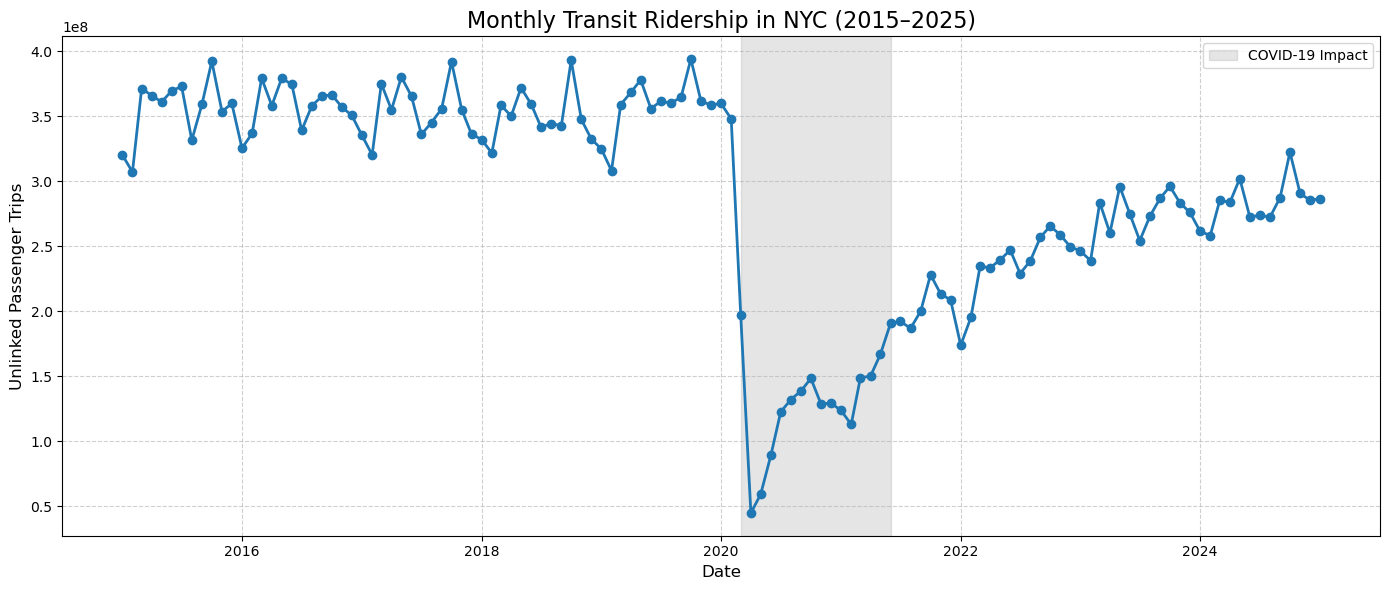

In [81]:
import matplotlib.pyplot as plt

# [5] Plot the total monthly ridership data.
plt.figure(figsize=(14, 6))
plt.plot(monthly_totals.index, monthly_totals.values, marker='o', linewidth=2)

# [6] Adding labels.
plt.axvspan(pd.to_datetime("2020-03-01"), pd.to_datetime("2021-06-01"), color='gray', alpha=0.2, label="COVID-19 Impact")  # I eyeballed up to 2021.
plt.title("Monthly Transit Ridership in NYC (2015–2025)", fontsize=16)

plt.xlabel("Date", fontsize=12)
plt.ylabel("Unlinked Passenger Trips", fontsize=12)

plt.grid(True, which='major', linestyle='--', alpha=0.6)
plt.legend()

plt.tight_layout()
plt.show()

As we can see:
+ **2015–2019**: There is a relatively stable total monthly ridership, roughly between 350–390 million trips/month.
+ **Early 2020**: There is a sudden drop in stable total monthly ridership because of COVID-19.
+ **2020–2021**: This was the lowest computed total monthly ridership. There was a small increase, followed by a quick dip.
+ **2022–2024**: There is a progressing gradual return. However, recent total monthly riderships are still below pre-pandemic levels.

### **VISUALIZATION 2:** ***TYPES OF TRANSPORTATION OVER TIME.***

Another visualization we can make is a plot of the **total number of linked passenger trips across all NYC agencies** against the month (just like before), **BUT** this time also including the **specific types of transportation.**

First, let's obtain a DataFrame that involves the month, the mode (type of transportation), and the number of unlinked passenger trips. Note that in our Excel file, the modes are notated as:
+ HR: Heavy Rail, such as the subway.
+ MB: Motorbus
+ CR: Commuter Rail
+ DR: Demand Response, such as paratransit.
+ CB: Commuter Bus
+ FB: Ferryboat
+ LR: Light Rail

In [92]:
# [1] Use the .melt() function to reshape our NYC DataFrame into a different DataFrame.
reshaped_df = my_NYC_df.melt(
    id_vars=["Agency", "Mode", "TOS", "UZA Name"],                   # Here, identifying variables are Agency, Mode, TOS, UZA Name (same as before).
    value_vars=date_columns,                                         # We're interested in plotting against the dates, so use the date columns.
    var_name="Month",
    value_name="Unlinked Passenger Trips"
)
#reshaped_df

# [2] Adjust the data under "Month" to be written in year-month-date format. (Same as before.)
reshaped_df["Month"] = pd.to_datetime(reshaped_df["Month"], format="%m/%Y")
#reshaped_df

# [3] Use the .groupby() function to create a new DataFrame that SPECIFICALLY groups our reshaped DataFrame by Month and Mode.
mode_df = reshaped_df.groupby(["Month", "Mode"])["Unlinked Passenger Trips"].sum().reset_index()
mode_df.head()

,Month,Mode,Unlinked Passenger Trips
0,2015-01-01,CB,2530781.0
1,2015-01-01,CR,21266346.0
2,2015-01-01,DR,738860.0
3,2015-01-01,FB,1907396.0
4,2015-01-01,HR,207664024.0


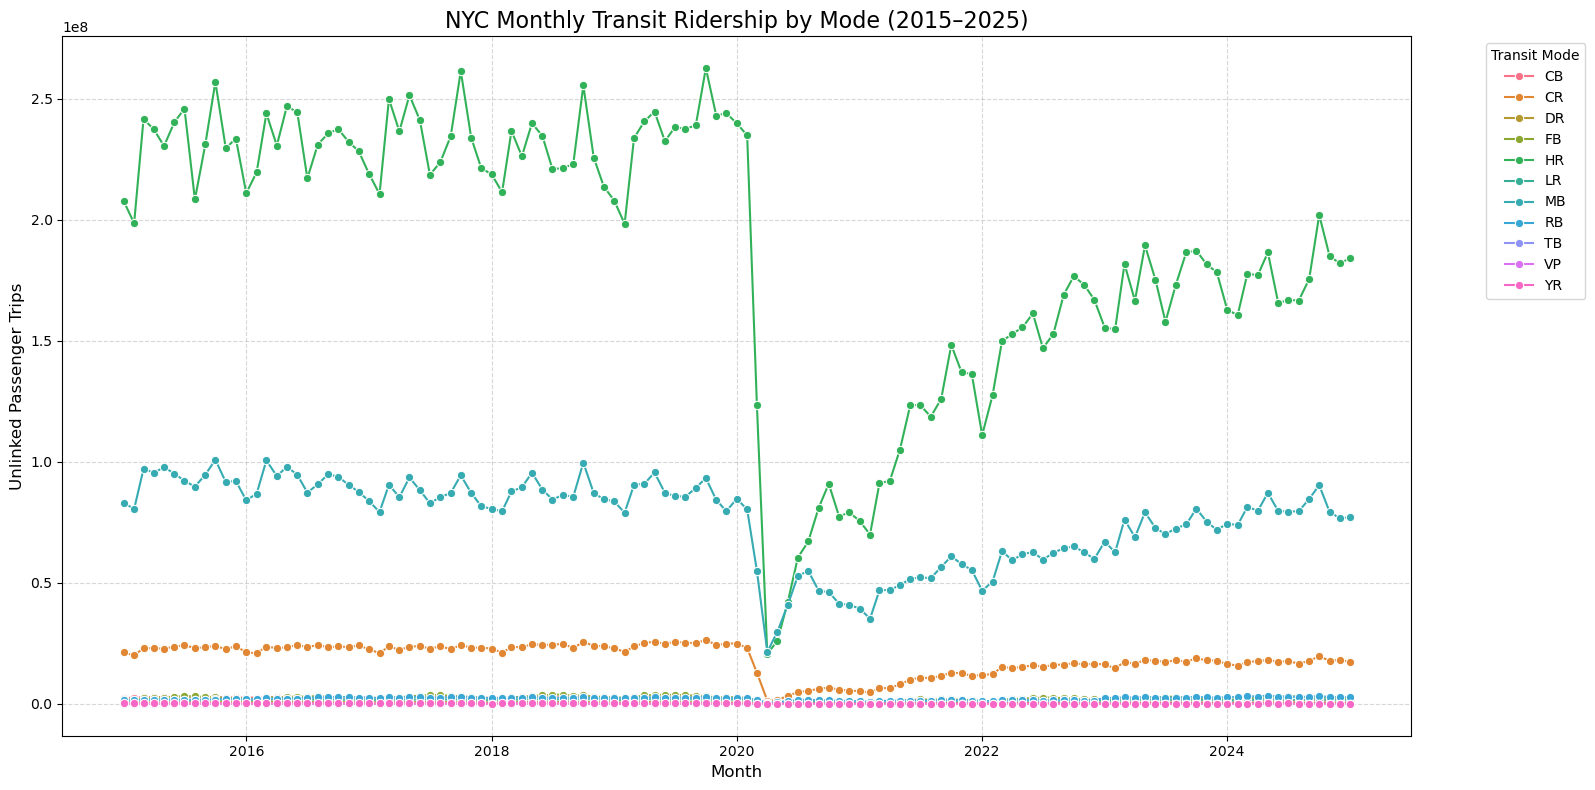

In [ ]:
import seaborn as sns

# [4] Plot the mode, total ridership, and months.
plt.figure(figsize=(16, 8))
sns.lineplot(data=mode_df, x="Month", y="Unlinked Passenger Trips", hue="Mode", marker="o")   # Each color is delineated to each unique mode.

# [5] Adding labels.]
plt.title("NYC Monthly Transit Ridership by Mode (2015–2025)", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Unlinked Passenger Trips", fontsize=12)
plt.legend(title="Transit Mode", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


As we can see:
+ **GREEN (HR)**: Heavy rails and subways were the most dominating mode. It experienced a relatively stable trend pre-pandemic, and experienced the fastest recovery post pandemic.
+ **BLUE (MB)**: Motor buses were the second most dominant mode. They experienced a similar pattern as HR — consistent trend pre-pandemic, and faced the second-fastest recover post pandemic.
+ **ORANGE (CR)**: Commuter Rail took longer to recover post-COVID. This **could be** because of the initiation of remote work, even years after the pandemic.
+ **YELLOW (DR; Paratransitic), PURPLE (Other modes such as ferries, light rails, etc.)**: These modes of transportation experienced low amounts of passenger trips both before and after the pandemic, with the pandemic **decreasing** passenger trips afterwards.

### **VISUALIZATION 3:** ***Year-to-Year Percent Change.***

Another visualization we can make is a plot of the **year-to-year percent change** in total unlinked passenger trips from 2015 to 2025. This can help give us insights into how unlinked passenger trips changed from year to year, and **hopefully** giving us some intuition into what contributed to the trends we've plotted earlier.

In [108]:
# [1] First, let's start with our DataFrame reshaped_df from earlier.
reshaped_df

# [2] For each year — 2015, 2016, ..., 2025 — let's add up all their monthly riderships.
reshaped_df["Year"] = reshaped_df["Month"].dt.year                                                # Extract the Year column
yearly_totals = reshaped_df.groupby("Year")["Unlinked Passenger Trips"].sum().reset_index()       # Add up 2015's trips, ..., 2025's trips.
yearly_totals                                                                                     # Here, we defined a new DataFrame with Year and Total Passenger Trips grouped together.

# [3] Using the .pct_change() function, compute all the year-to-year percent changes from 2015 to 2025.
yearly_totals["YoY % Change"] = yearly_totals["Unlinked Passenger Trips"].pct_change() * 100
yearly_totals                                                                                     # This is the DataFrame we'll plot

,Year,Unlinked Passenger Trips,YoY % Change
0,2015,4.264746e+09,NaN
1,2016,4.289902e+09,0.589856
2,2017,4.251568e+09,-0.893594
3,2018,4.195425e+09,-1.320516
4,2019,4.294356e+09,2.358064
5,2020,1.898451e+09,-55.791961
6,2021,2.123008e+09,11.828470
7,2022,2.822360e+09,32.941549
8,2023,3.269419e+09,15.839909
9,2024,3.395463e+09,3.855221


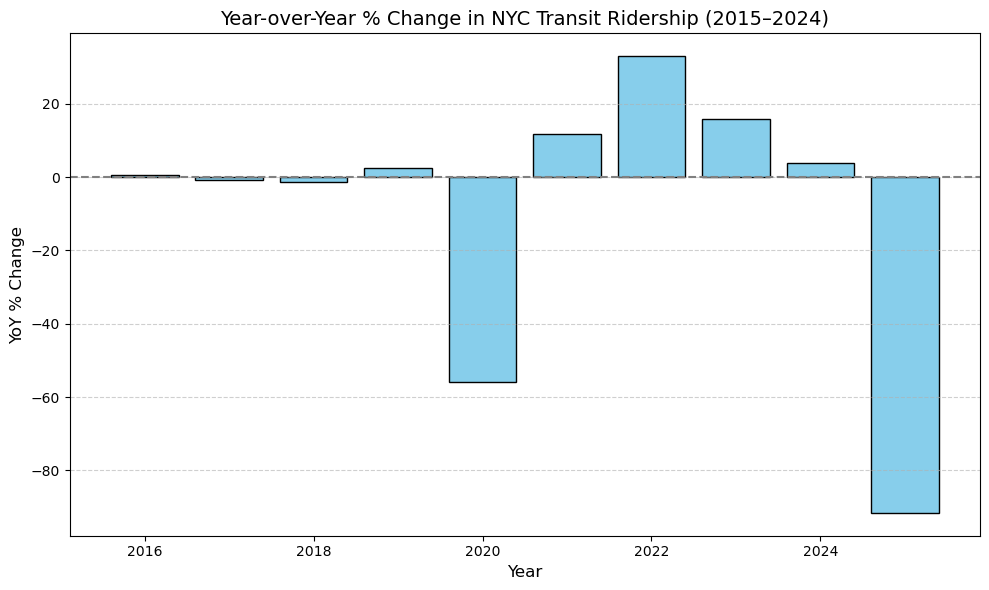

In [109]:
# [4] Plot the computed year-over-year % changes as a bar graph.
plt.figure(figsize=(10, 6))
plt.bar(yearly_totals["Year"], yearly_totals["YoY % Change"], color='skyblue', edgecolor='black')

# [5] Adding labels.
plt.axhline(0, color='gray', linestyle='--')
plt.title("Year-over-Year % Change in NYC Transit Ridership (2015–2024)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("YoY % Change", fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

As we can see:
+ In 2020, there has roughly been a –58% drop due to the pandemic.
+ In 2021–2022, there have been positive percent changes post-pandemic.
+ **BUT** starting around 2023 (and going onward towards 2024), there have been **negative** percent changes.

Why haven't yearly total riderships been increasing post-pandemic? This is likely because of the fact that after the pandemic, many people resorted to **hybrid-work**.
+ There was no such thing as hybrid-work before the pandemic. Everyone was always expected to come to work.
+ But after the pandemic, remote-work has evolved into hybrid-work — people now feel it makes sense that have hybrid-work as an option (ZOOM calls, Team meetings).
----